<a href="https://colab.research.google.com/github/AjmalSarwary/Preprocessing/blob/main/varclus_to_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Dimensionality Reduction of dataset=Ameshousing
using hierarchical agglomeration by criterion:
split as long as the 2nd Eigenvalue is > maxeigen=0.6
about the dataset: Observations 1388, Variables 32




In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
#Add the directory to PYTHONPATH environment variable :
import sys
sys.path.append('/content/drive/My Drive/my_packages')

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming `ames70` is a pandas DataFrame and `fullset` is a list of variable names
# Replace these with your actual DataFrame and variable list
ames70 = pd.read_csv('/content/drive/My Drive/datasets/ames70.csv')

fullset = ["Gr_Liv_Area", "Total_Bsmt_SF", "Bsmt_Fin_SF", "Bsmt_Unf_SF", "Lot_Area",
"Age_at_Sale", "Bedroom_AbvGr", "High_Kitchen_Quality", "fullbath_2plus",
"fireplace_1plus", "TwoPlusCar_Garage", "High_Exterior_Cond",
"High_Exterior_Qual", "One_Floor", "Vinyl_Siding", "CuldeSac", "Has_Fence",
"Land_Level", "Poured_Concrete", "Paved_Driveway", "Total_Functionality",
"Normal_Prox_Cond", "AboveAverage_Quality", "BelowAverage_Quality",
"AboveAverage_Condition", "BelowAverage_Condition", "Excellent_Heat_QC",
"Irreq_Lot_Shape", "C_Air", "nbr_clus1", "nbr_clus2", "nbr_clus3"]



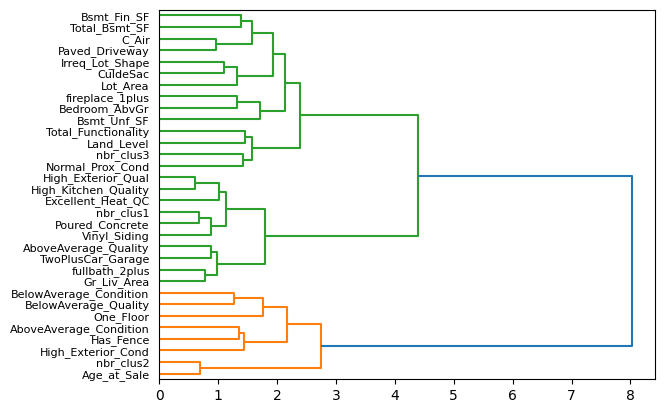

In [ ]:




# Select only the variables in the fullset
data = ames70[fullset]

# Calculate the correlation matrix
corr_matrix = data.corr().values


# Perform hierarchical/agglomerative clustering
clusters = linkage(corr_matrix, method='ward')


# Create a dendrogram
dendrogram(clusters, labels=data.columns, orientation='right',
                        color_threshold=0.6*np.max(clusters[:, 2]))

plt.show()


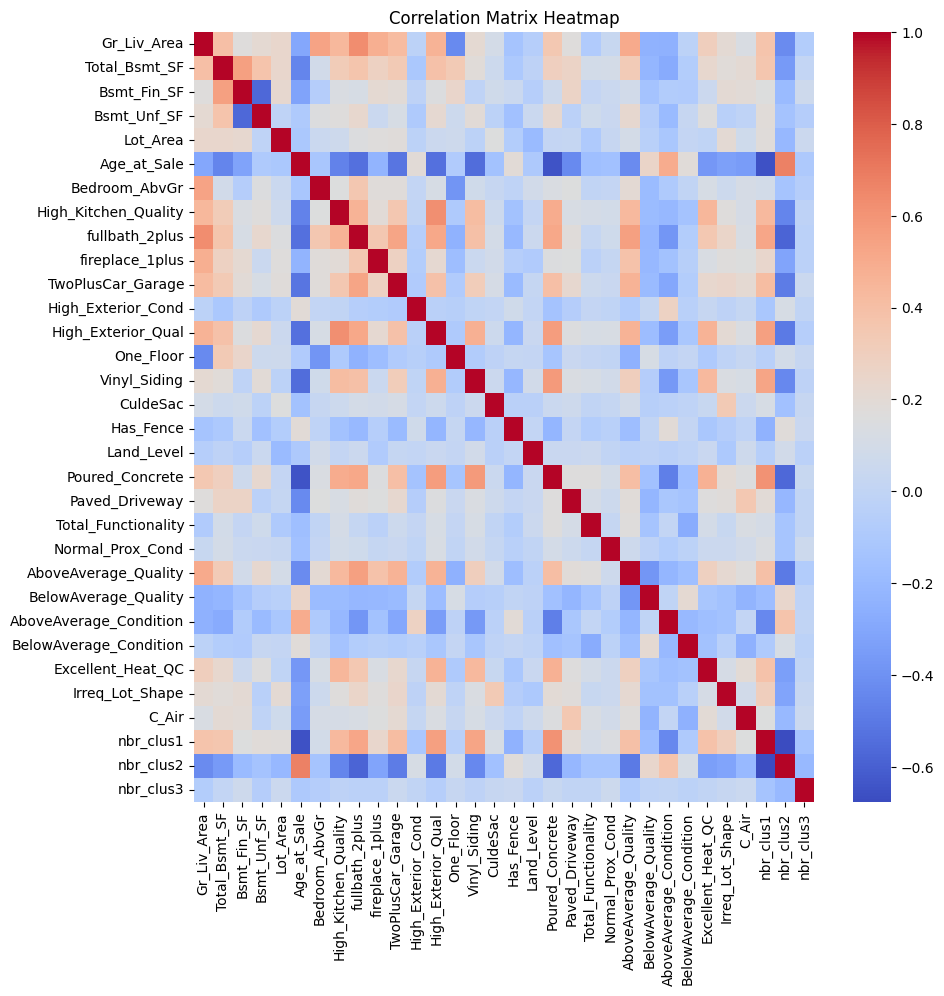


32

    Index1  Index2  Distance  ClusterSize
0      7.0    12.0  0.600083          2.0
1     18.0    29.0  0.677539          2.0
2      5.0    30.0  0.686739          2.0
3      0.0     8.0  0.780891          2.0
4     10.0    22.0  0.867437          2.0
5     14.0    33.0  0.875131          3.0
6     19.0    28.0  0.958903          2.0
7     35.0    36.0  0.975766          4.0
8     26.0    32.0  1.008282          3.0
9     15.0    27.0  1.094178          2.0
10    37.0    40.0  1.125279          6.0
11    23.0    25.0  1.272451          2.0
12     4.0    41.0  1.308878          3.0
13     6.0     9.0  1.314022          2.0
14    16.0    24.0  1.351248          2.0
15     1.0     2.0  1.380517          2.0
16    21.0    31.0  1.416217          2.0
17    11.0    46.0  1.441402          3.0
18    17.0    20.0  1.454524          2.0
19    48.0    50.0  1.578789          4.0
20    38.0    47.0  1.578812          4.0
21     3.0    45.0  1.707026          3.0
22    13.0    43.0  1.761936 

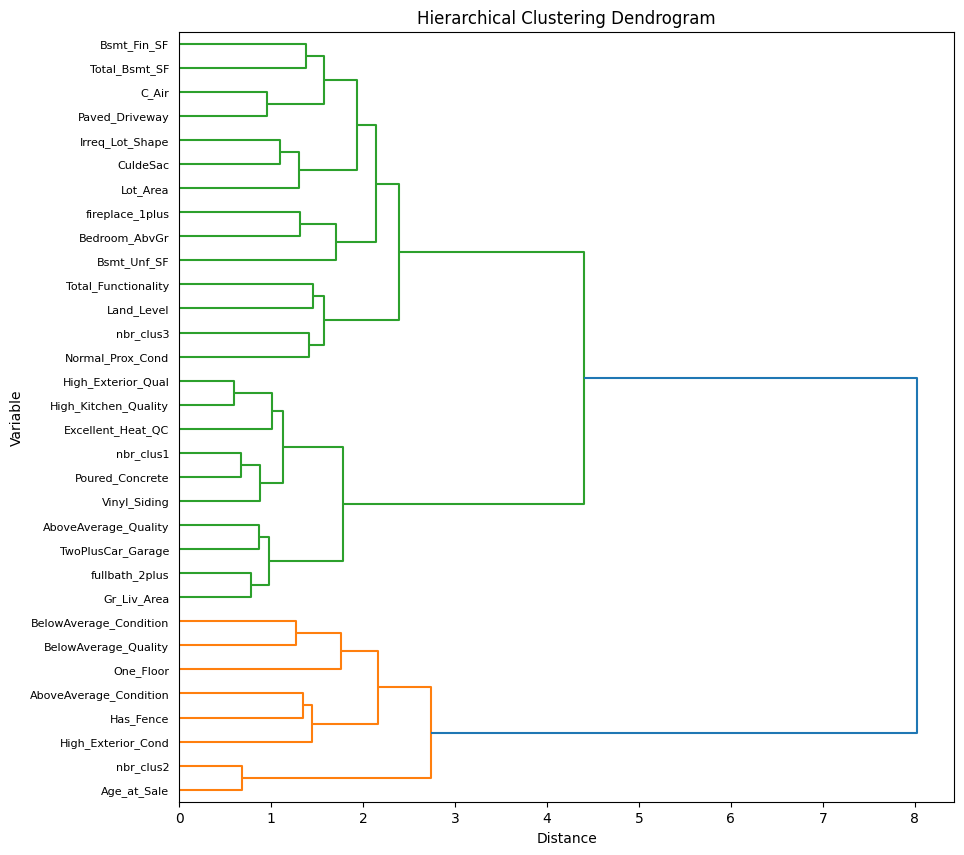

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()

# Print the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

print()
print(len(fullset))
print()
# Perform hierarchical/agglomerative clustering
clusters = linkage(corr_matrix, method='ward')

# Create a DataFrame for more readable cluster data
cluster_df = pd.DataFrame(clusters, columns=['Index1', 'Index2', 'Distance', 'ClusterSize'])
print(cluster_df)
print()

# Create a dendrogram
plt.figure(figsize=(10, 10))
dendrogram(clusters, labels=data.columns, orientation='right',
                        color_threshold=0.6*np.max(clusters[:, 2]))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Variable')
plt.show()


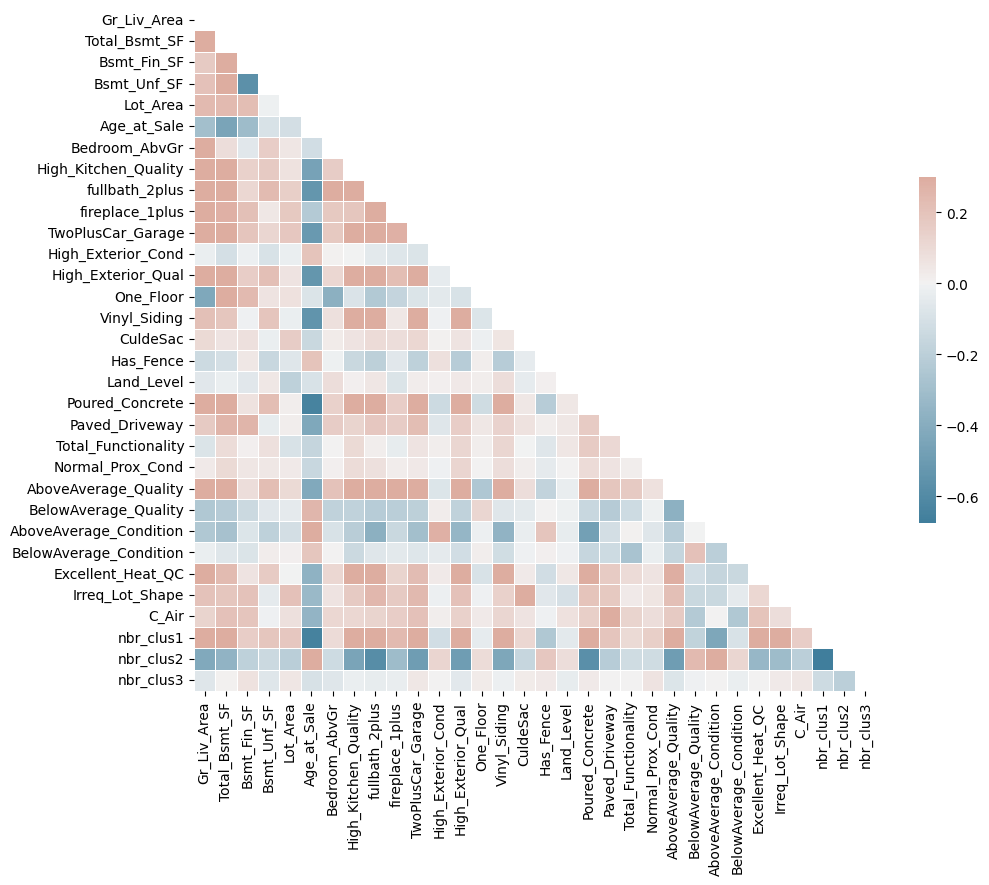

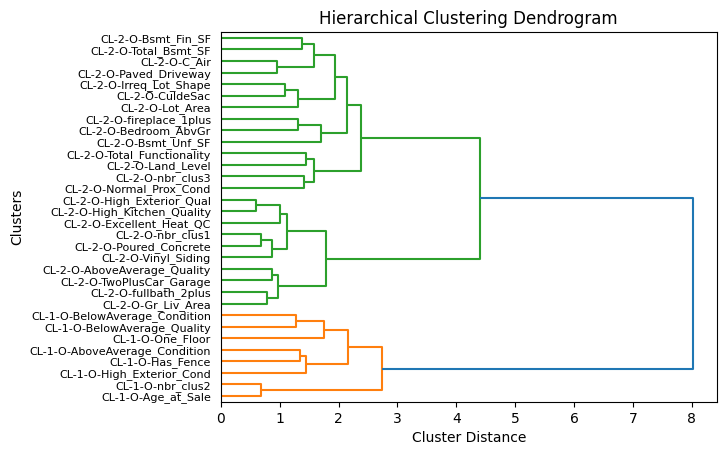

,Index1,Index2,Distance,ClusterSize
0,CL-2-O-High_Kitchen_Quality,CL-2-O-High_Exterior_Qual,0.600083,2.0
1,CL-2-O-Poured_Concrete,CL-2-O-nbr_clus1,0.677539,2.0
2,CL-1-O-Age_at_Sale,CL-1-O-nbr_clus2,0.686739,2.0
3,CL-2-O-Gr_Liv_Area,CL-2-O-fullbath_2plus,0.780891,2.0
4,CL-2-O-TwoPlusCar_Garage,CL-2-O-AboveAverage_Quality,0.867437,2.0
5,CL-2-O-Vinyl_Siding,CL-34,0.875131,3.0
6,CL-2-O-Paved_Driveway,CL-2-O-C_Air,0.958903,2.0
7,CL-36,CL-37,0.975766,4.0
8,CL-2-O-Excellent_Heat_QC,CL-33,1.008282,3.0
9,CL-2-O-CuldeSac,CL-2-O-Irreq_Lot_Shape,1.094178,2.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Select only the variables in the fullset
data = ames70[fullset]

# Calculate the correlation matrix
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


# Cut the dendrogram at a certain distance to form flat clusters
max_d = 0.7 * np.max(clusters[:, 2])
cluster_assignments = fcluster(clusters, max_d, criterion='distance')

# Create a list to hold the names
cluster_names = ["O-"+name for name in fullset]


# Assign each variable to its final cluster
for i, cluster_num in enumerate(cluster_assignments):
    cluster_names[i] = "CL-"+str(cluster_num)+"-"+cluster_names[i]

# Draw the dendrogram
dendrogram(clusters, labels=cluster_names, orientation='right', color_threshold=max_d)
plt.xlabel("Cluster Distance")
plt.ylabel("Clusters")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()



# Updating the cluster_names array to include new clusters as they are formed
for i in range(len(fullset), len(clusters)+len(fullset)):
    cluster_names.append("CL-"+str(i+1))

# Create a DataFrame to hold the hierarchical clustering output
hc_output = pd.DataFrame(clusters, columns=['Index1', 'Index2', 'Distance', 'ClusterSize'])

# Adjust the indices to match the SAS indexing and map the indices to the actual cluster names
hc_output['Index1'] = hc_output['Index1'].apply(lambda x: cluster_names[int(x)])
hc_output['Index2'] = hc_output['Index2'].apply(lambda x: cluster_names[int(x)])

# Print the output
hc_output


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df is your DataFrame and n is the number of clusters you want to test up to
def perform_kmeans(df, n):
    var_explained_df = pd.DataFrame(columns=["NumberOfClusters", "TotVarExplained", "PropVarExplained",
                                             "MinPropExplained", "MaxSecondEigVal", "MinRSquare", "MaxOneMinusRSquare"])
    summary_df = pd.DataFrame(columns=["NumberOfClusters", "ControlVar", "Cluster", "Variable",
                                       "OwnCluster", "NextClosest", "RSquareRatio"])
    for i in range(2, n+1):
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=i, random_state=0).fit(df)

        # Get cluster labels
        labels = kmeans.labels_

        # Add to var_explained_df
        # You'll need to calculate these values according to your specific case
        # This is a placeholder
        var_explained_df.loc[len(var_explained_df)] = [i, 0, 0, 0, 0, 0, 0]

        # Add to summary_df
        for label in set(labels):
            # Add a row for each variable in the cluster
            # Again, you'll need to calculate these values
            # This is a placeholder
            summary_df.loc[len(summary_df)] = [i, 0, f"Cluster {label+1}", "VariableName", 0, 0, 0]

    return var_explained_df, summary_df

# Create the DataFrame and clean NaN values
df = pd.DataFrame(data)
df = df.fillna(df.mean())  # or use df = df.dropna() if that's preferable

# Now call the function
var_explained_df, summary_df = perform_kmeans(df, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
var_explained_df

,NumberOfClusters,TotVarExplained,PropVarExplained,MinPropExplained,MaxSecondEigVal,MinRSquare,MaxOneMinusRSquare
0,2,0,0,0,0,0,0
1,3,0,0,0,0,0,0
2,4,0,0,0,0,0,0
3,5,0,0,0,0,0,0
4,6,0,0,0,0,0,0
5,7,0,0,0,0,0,0
6,8,0,0,0,0,0,0
7,9,0,0,0,0,0,0
8,10,0,0,0,0,0,0


In [ ]:
summary_df

,NumberOfClusters,ControlVar,Cluster,Variable,OwnCluster,NextClosest,RSquareRatio
0,2,0,Cluster 1,VariableName,0,0,0
1,2,0,Cluster 2,VariableName,0,0,0
2,3,0,Cluster 1,VariableName,0,0,0
3,3,0,Cluster 2,VariableName,0,0,0
4,3,0,Cluster 3,VariableName,0,0,0
5,4,0,Cluster 1,VariableName,0,0,0
6,4,0,Cluster 2,VariableName,0,0,0
7,4,0,Cluster 3,VariableName,0,0,0
8,4,0,Cluster 4,VariableName,0,0,0
9,5,0,Cluster 1,VariableName,0,0,0
